## Water Fountains in Neighborhoods
##### Everyone knows that dogs, like most living things, need water to survive. When someone is walking their dog, it's important for them to make sure that they have access to water. So, when picking the best neighborhood for your dog, you should consider the amount of water fountains that are in the neighborhood.
![dog at water fountain](https://64.media.tumblr.com/c5c491671ef9edda5508d3285a41302a/tumblr_n6lhmnXMng1tv4atfo1_500.gif)

In [1]:
# import pandas
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

#### The Dataset
This dataset shows all the water fountains within Pittsburgh. It also gives the type of fountain, the neighorhood it is in, the park or area it is in, and the coordinates of the fountain, among other things.

In [2]:
# Read in data and display chart
water = pd.read_csv("WaterFountains.csv")
water

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,1646811568,Nelson Mandela Peace Park Spray Fountain,NaN,Spray,NaN,NaN,NaN,Garfield,9,10,42003101700,2,10,5,3-4,40.466093,-79.940662
221,1127368170,Westinghouse Park,Continuous,Drinking Fountain,NaN,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Point Breeze North,9,14,42003140500,2,14,4,3-14,40.452550,-79.902936
222,1861451108,Liberty Green Park,On/Off,Drinking Fountain,NaN,Most Dependable,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462618,-79.919551
223,1019085573,Wightman Park,On/Off,Drinking Fountain,NaN,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Squirrel Hill North,8,14,42003140300,3,14,4,2-18,40.443145,-79.926970


#### Starting to Scale Down
We really only need to consider drinking fountains as far as keeping our dog hydrated goes. So here, I used a query mask in order to create a dataset with just the drinking fountains. You can see that dataset below.

In [3]:
#Query mask for just drinking fountains
query_mask = water['feature_type'] == 'Drinking Fountain'
fountains = water[query_mask]
fountains

,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408433,-80.028327
1,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440445,-79.984061
2,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454382,-80.008277
3,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450866,-80.001959
4,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450995,-80.001498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1743868744,Fineview Park,On/Off,Drinking Fountain,NaN,NaN,https://tools.wprdc.org/images/pittsburgh/wate...,Fineview,1,25,42003250900,1,25,1,1-10,40.461600,-80.003854
221,1127368170,Westinghouse Park,Continuous,Drinking Fountain,NaN,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Point Breeze North,9,14,42003140500,2,14,4,3-14,40.452550,-79.902936
222,1861451108,Liberty Green Park,On/Off,Drinking Fountain,NaN,Most Dependable,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462618,-79.919551
223,1019085573,Wightman Park,On/Off,Drinking Fountain,NaN,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Squirrel Hill North,8,14,42003140300,3,14,4,2-18,40.443145,-79.926970


#### Sorting it out
Now for this to be useful and only show what I really need, I put the neighborhoods in a dictionary and then used a loop to count how many drinking fountains were in each neighborhood. Then, I took the dictionary and created a dataset with it.

In [4]:
# Create set that says how many water fountains are in each neighborhood
neighborhood_list = fountains['neighborhood'].tolist()
fountainDict = {}
count = 0
fountain_neighborhood = []
#Creating a dictionary of neighborhoods and how many water fountains are in each
while count < 191:
    hood = neighborhood_list[count]
    if hood in fountainDict:
        fountainDict[hood] = fountainDict[hood] + 1
    else:
        fountainDict[hood] = 1
        fountain_neighborhood.append(hood)
    count = count + 1
fountainDict

#Creating a series with that dictionary
amount_of_fountains = []   
fountain_series = pd.Series(fountainDict)
fountain_series

#Create the dataframe with that series
for hood in fountain_neighborhood:
    amount_of_fountains.append(fountainDict[hood])
fountain_df = pd.DataFrame(amount_of_fountains, fountain_neighborhood)
fountain_df.columns = ['amount_of_fountains']
fountain_df.index.name = 'neighborhood'
fountain_df

,amount_of_fountains
neighborhood,
Beechview,5
Crawford-Roberts,3
Allegheny Center,4
Bedford Dwellings,1
South Side Flats,3
...,...
Central Business District,2
Middle Hill,1
Point Breeze North,2


#### Comparing Top Neighborhoods
There are still quite a few neighborhoods in this dataset. In order to compare easily, I needed to narrow down the dataset even further by isolating the neighborhoods that had more than a couple of fountains. You can see the comparison very clearly in the bar graph below.

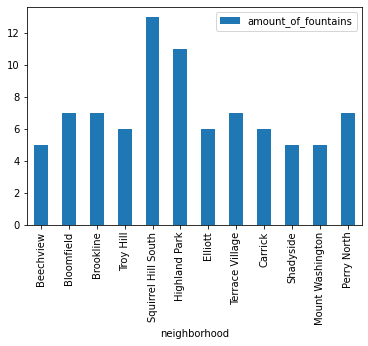

In [5]:
# Query mask to filter out smaller values
query_mask = fountain_df['amount_of_fountains'] > 4
filtered_fountain = fountain_df[query_mask]
filtered_fountain.plot(kind='bar')

Observe the significant difference in water fountains between neighborhoods. Squirrel Hill South has the most, with Highland Park a few behind.

#### Put it on the Map!
A bar graph is one good way to compare neighborhoods, but what if you want to visualize it more? That's where a map comes in! Below, I used geopandas to merge the the map shape and the water fountain dataset (with all neighborhoods, not just the ones with the most fountains). Finally, I plotted the map, and now you can see where there are more water fountains.

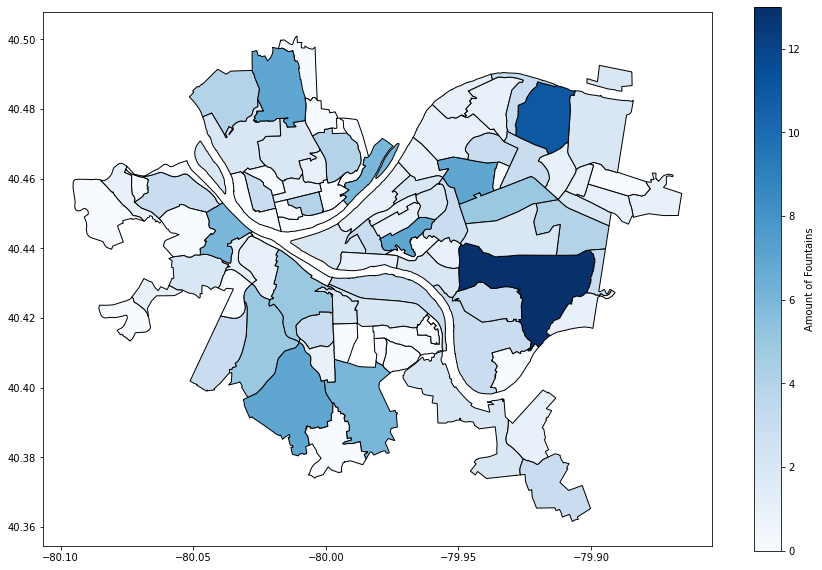

In [6]:
neighborhoodmap = geopandas.read_file("Map/Neighborhoods.shp")
# do the merge
fountain_map = neighborhoodmap.merge(fountain_df, how='left', left_on='hood', right_on='neighborhood')
fountain_map['amount_of_fountains'] = fountain_map['amount_of_fountains'].fillna(0)
# look at the head to confirm it merged correctly
fountain_map[['hood','amount_of_fountains','geometry']]
fountain_map.plot(column='amount_of_fountains', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Amount of Fountains"}, # label the legend
               figsize=(15, 10),         # set the size
               )

#### Conclusion
Based on the data above, one can clearly tell that Squirrel Hill South has the most drinking fountains. While most neighborhoods have at least one, many do not have more than a couple, and only two neighborhoods, including Squirrel Hill South, have over ten. Squirrel Hill is far superior in terms of drinking fountains, so if you live there, one could say that you would be *swimming* in water (get it?).

![singing in rain guy jumping aroung in water](https://media0.giphy.com/media/m9HKyqt4Xauic/giphy.gif?cid=ecf05e4727u9z8xgryrwaosdtilmnuxajiu63wv57y2y0lhj&rid=giphy.gif&ct=g)